## Data importing and preprocessing

In [1]:
import numpy as np
import pandas as pd
import altair as alt

In [2]:
df = pd.read_csv('/Users/bhaskarn/Development/Python_Projects/Data_Prep_Linear_Reg/Data/House_Price.csv')
df.head(3)

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764


In [3]:
df.shape

(506, 19)

In [4]:
df.isnull().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

In [5]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


In [6]:
alt.renderers.set_embed_options(theme='dark')
alt.Chart(df).mark_circle(color='yellow', opacity=0.5).encode(x='rainfall', y='price')

alt.Chart(...)

In [7]:
alt.renderers.set_embed_options(theme='dark')
alt.Chart(df).mark_circle(color='orange').encode(x='n_hot_rooms', y='price')

alt.Chart(...)

In [8]:
alt.Chart(df).mark_circle(color='teal', opacity=0.5).encode(x='crime_rate', y='price')

alt.Chart(...)

In [9]:
df.describe(include='object')

,airport,waterbody,bus_ter
count,506,506,506
unique,2,4,1
top,YES,River,YES
freq,279,183,506


<AxesSubplot:xlabel='airport', ylabel='count'>

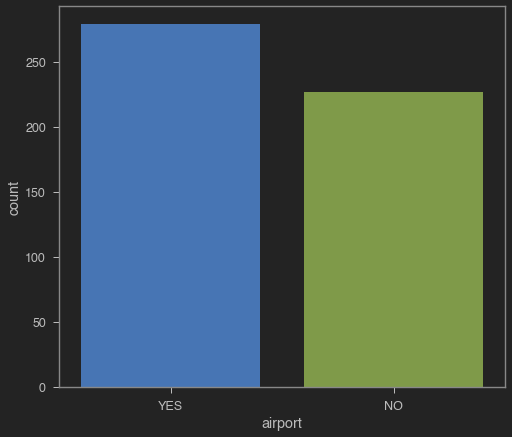

In [10]:
import seaborn as sns
sns.countplot(x='airport', data=df)

<AxesSubplot:xlabel='waterbody', ylabel='count'>

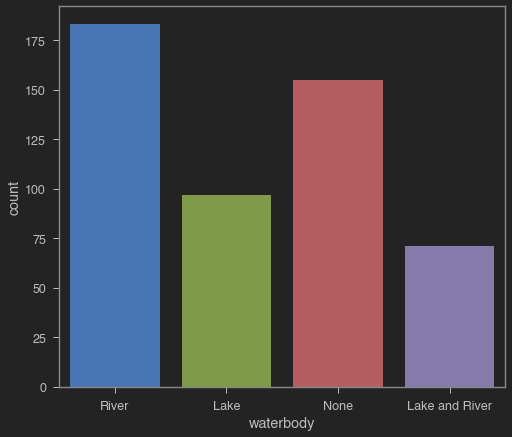

In [11]:
sns.countplot(x='waterbody', data=df)

<AxesSubplot:xlabel='bus_ter', ylabel='count'>

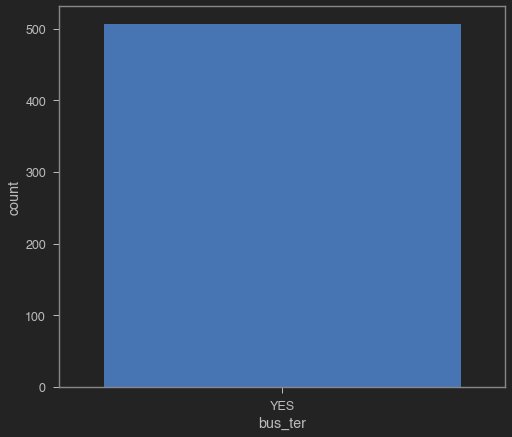

In [12]:
sns.countplot(x='bus_ter', data=df)

## Observations from EDD

##### Missing values in n_hos_beds
##### Skewness outliers in crime rate
##### Outliers in n_hot_rooms and rainfall
##### Variable 'bus_ter' has only once level 'yes'

## Outlier treatment

<img src="outlier_treatment.png">

#### Let's perform capping and flooring

##### For variable : n_hot_rooms

In [13]:
## We want to see 99 percentile value of n_hot_rooms
np.percentile(df.n_hot_rooms, [99])

array([15.39952])

In [14]:
## Above is in the form of array
## Let's get the value
## Since the above array has only value, let's do so bu 0 index
np.percentile(df.n_hot_rooms, [99])[0]

15.399519999999999

In [15]:
## This number is actually upper limit
uv = np.percentile(df.n_hot_rooms, [99])[0]

In [16]:
## Lets identify the outliers now
df[df.n_hot_rooms>uv]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [17]:
## We do not want to modify 15.4 which is close to uv
## We want to bring 101 and 81 as close as possible to the uv
## 3*uv roughly is 45 so 101 and 81 would get detected
df.n_hot_rooms[(df.n_hot_rooms > 3*uv)] = uv

<ipython-input-17-4ea2fe5956d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[(df.n_hot_rooms > 3*uv)] = uv


In [18]:
df[df.n_hot_rooms>uv]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.3,15.4,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.9,15.4,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.0,15.4,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.7,15.4,River,58,YES,0.067477


##### For variable : rainfall

In [19]:
## We want to see 1 percentile value of rainfall
np.percentile(df.rainfall,[1])

array([20.])

In [20]:
lv = np.percentile(df.rainfall,[1])[0]
lv

20.0

In [21]:
df[df.rainfall<lv]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019


In [22]:
df.rainfall[(df.rainfall < 0.3*lv)] = lv

<ipython-input-22-ac089947a860>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[(df.rainfall < 0.3*lv)] = lv


In [23]:
df[df.rainfall<lv]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks


In [24]:
##### For variable : crime_rate

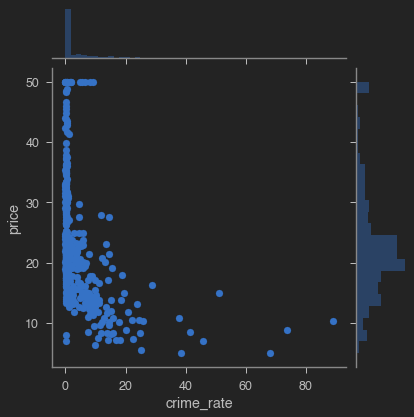

In [25]:
sns.jointplot(x='crime_rate', y='price', data=df)

## Missing Value Imputation

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [27]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

## Transformation

##### Log transformation

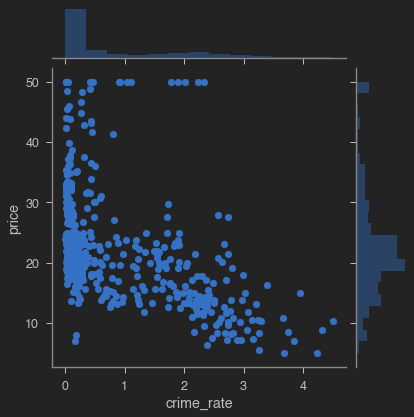

In [28]:
df.crime_rate = np.log(1+df.crime_rate) ## notice we are adding 1
## without adding -1, transformed values go below 0
## Since most original values are around 0, and log(0) -> -infinity
sns.jointplot(x='crime_rate', y='price', data=df)

##### Tukey's transformation (we're selecting 3rd quadrant)

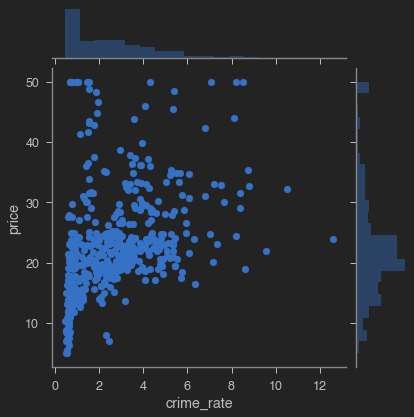

In [29]:
## This is Tukey's ladder for trasformation, which didn't work that great on our data
df_copy = df.copy()
df_copy.crime_rate = (1/np.sqrt(df_copy.crime_rate))
sns.jointplot(x='crime_rate', y='price', data=df_copy)

##### Transform variables dist_1....dist_4 into one (since they all represent same info)

In [30]:
df['dist_avg'] = (df.dist1+df.dist2+df.dist3+df.dist4)/4
df.head(2)

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,dist_avg
0,24.0,0.006300,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,4.9675


In [31]:
df.drop(['dist1', 'dist2', 'dist3', 'dist4'], axis=1, inplace=True)
df.head(2)

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,dist_avg
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,4.9675


In [32]:
df.describe(include=object)

,airport,waterbody,bus_ter
count,506,506,506
unique,2,4,1
top,YES,River,YES
freq,279,183,506


In [34]:
del df['bus_ter']
df.head(2)

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,dist_avg
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.1920,River,23,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.1728,Lake,42,0.046146,4.9675
